# Chapter 9- Servless

## Author : [Ayoub Berdeddouch](https://linkedin.com/in/ayoub-berdeddouch)

In [1]:
%autosave 1

In [2]:
!python -V


Python 3.7.6


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.3.0'

In [4]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [5]:
model = keras.models.load_model('dogs_cats_10_0.687.h5')


# Convert Keras to TF-Lite

# Question 1
* Now convert this model from Keras to TF-Lite format.

* What's the size of the converted model?
    * the size is = `44.9MB`

In [6]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('dogs-cats-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpwuekyw9f\assets


# Question 2
* To be able to use this model, we need to know the index of the input and the index of the output.

* What's the output index for this model?
    * The output index is = ` 13`

In [7]:
import tensorflow.lite as tflite

In [8]:
interpreter = tflite.Interpreter(model_path='dogs-cats-model.tflite')
interpreter.allocate_tensors()

In [9]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [10]:
input_index

0

In [11]:
output_index

13

# Preparing the image

* You'll need some code for downloading and resizing images. You can use this code:

```python
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img
```

* For that, you'll need to have pillow installed:

`pip install pillow`

* Let's download and resize this image:

    * https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg

* Based on [the solution of the previous homework](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/08-deep-learning/CNN_solution.ipynb), what should be the target size for the image?
    ## Answer * the target size = `(150,150)`

In [12]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

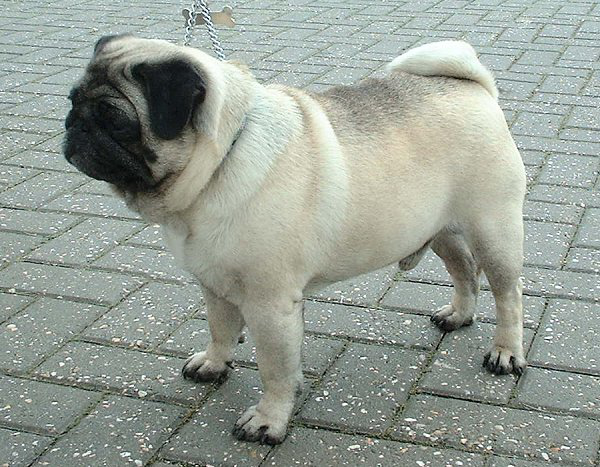

In [13]:
dog_img = download_image('https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg')
dog_img

In [14]:
# based on the last homework the target size is (150,150)
X = prepare_image(dog_img, (150,150))

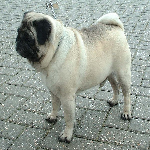

In [15]:
X

# Question 3
* Now we need to turn the image into an numpy array and pre-process it.

`Tip: Check the previous homework. What was the pre-processing we did there?`

* After the pre-processing, what's the value in the first pixel, the R channel?
    ## Answer * the first pixel, the R channel = 
        `[180., 197., 191.],
         [177., 194., 186.],
         [161., 178., 170.]`

In [16]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

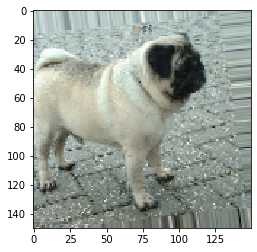

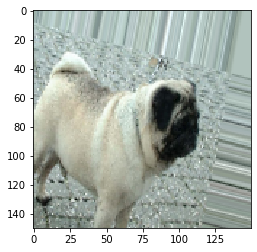

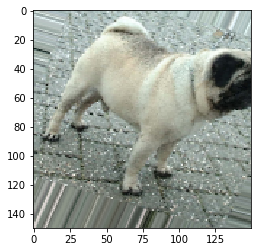

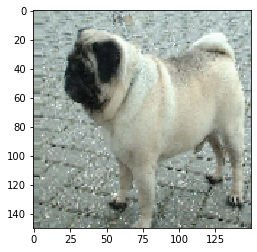

In [18]:
x = image.img_to_array(X)

x = x.reshape((1,) + x.shape)
x = x/255

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [19]:
x

array([[[[0.7058824 , 0.77254903, 0.7490196 ],
         [0.69411767, 0.7607843 , 0.7294118 ],
         [0.6313726 , 0.69803923, 0.6666667 ],
         ...,
         [0.7647059 , 0.8509804 , 0.8392157 ],
         [0.68235296, 0.74509805, 0.74509805],
         [0.6745098 , 0.76862746, 0.7764706 ]],

        [[0.5254902 , 0.5921569 , 0.5686275 ],
         [0.7372549 , 0.8039216 , 0.78039217],
         [0.60784316, 0.6745098 , 0.6431373 ],
         ...,
         [0.7921569 , 0.8666667 , 0.85882354],
         [0.6313726 , 0.7019608 , 0.6392157 ],
         [0.7882353 , 0.8784314 , 0.85490197]],

        [[0.6862745 , 0.7490196 , 0.7372549 ],
         [0.61960787, 0.6862745 , 0.6627451 ],
         [0.64705884, 0.7137255 , 0.68235296],
         ...,
         [0.6       , 0.65882355, 0.64705884],
         [0.627451  , 0.69411767, 0.654902  ],
         [0.7058824 , 0.79607844, 0.77254903]],

        ...,

        [[0.5803922 , 0.61960787, 0.58431375],
         [0.49019608, 0.5254902 , 0.5058824 ]

# Question 4
* Now let's apply this model to this image. What's the output of the model?

    ## Answer * the output is = `1 == Dog`

In [21]:
interpreter.set_tensor(input_index, x)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [22]:
preds

array([[0.7704913]], dtype=float32)

In [23]:
label = "Dog" if preds[0][0] >= 0.5 else "Cat"
label

'Dog'

In [24]:
# using tensorflow.tflite

In [25]:
!python lambda_function.py 

Prediction is = Dog


In [26]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/


In [27]:
# using tflite_runtime

In [28]:
!python lambda_function.py 

Prediction is = Dog


In [29]:
# Other test using Import as library

In [30]:
import lambda_function

Prediction is = Dog


In [31]:
lambda_function.predict('https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg')

'Dog'

In [32]:
event = {'url': 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg'}
lambda_function.lambda_handler(event, None)

'Dog'

# Question 5

* Create the Docker file :

```Dockerfile

FROM agrigorev/zoomcamp-cats-dogs-lambda:v2

RUN pip install https://github.com/alexeygrigorev/tflite-aws-lambda/raw/main/tflite/tflite_runtime-2.7.0-cp38-cp38-linux_x86_64.whl
RUN pip install pillow
RUN pip install requests

COPY dogs-cats-model-v3-ab.tflite .
COPY lambda_function.py .

CMD [ "lambda_function.lambda_handler" ]
```


* Build the image :

![Build](docker-dogs-cats.png)
![Build](docker-dogs-cats-2.png)
![Build](docker-dogs-cats-3.png)
![Build](docker-dogs-cats-finish.png)
![Build](docker-dogs-cats-finish_id_image.png)
![build](docker-dogs-cats-test_exec.png)


# Question 6

* Now run the container locally.

* Score this image: https://upload.wikimedia.org/wikipedia/commons/1/18/Vombatus_ursinus_-Maria_Island_National_Park.jpg

* What's the output from the model?
    # Answer *  the output is =`0.54`

In [39]:
!python test.py

[0.5413472652435303]
